###### DATA importing

In [162]:
import numpy as np
import pandas as pd


In [163]:
df=pd.read_csv('laptop_data.csv')

In [164]:
df.head()
#df.shape
#df.info()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [165]:
df.duplicated().sum()

0

In [166]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [167]:
# to drop Unnamed column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [168]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [169]:
# to remove the GB word fom the RAM column
df['Ram'] = df['Ram'].str.replace('GB','')

In [170]:
# to remove the 'Kg' from the weight column
df['Weight'] = df['Weight'].str.replace('kg','')

In [171]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
249,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,512GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,108691.2000
584,Dell,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.26,15717.6000
1050,Lenovo,Notebook,14.0,IPS Panel 2560x1440,Intel Core i7 6600U 2.6GHz,16,256GB SSD,Intel HD Graphics 520,Windows 7,1.1,139593.6000
130,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,34045.3872
994,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.68,47365.9200


In [172]:
# changing the data type of Ram and Weight column
df['Ram'] =df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


### EDA univarient and bivarient

D:\Software\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

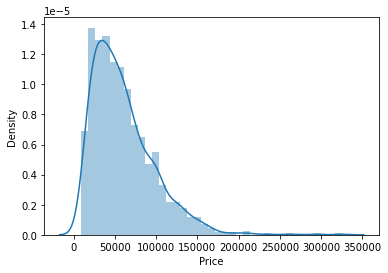

In [174]:
import seaborn as sns
sns.distplot(df['Price'])
# data is right skweed it means there is more laptop which having less price and there is very less laptop which having 
#more/high price

In [175]:
import matplotlib.pyplot as plt

<AxesSubplot:>

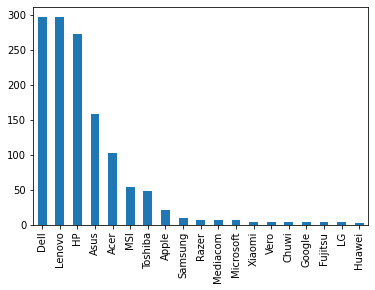

In [176]:
df['Company'].value_counts().plot(kind='bar')

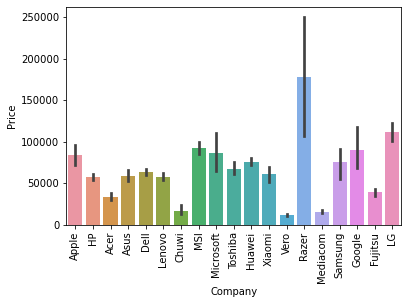

In [177]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

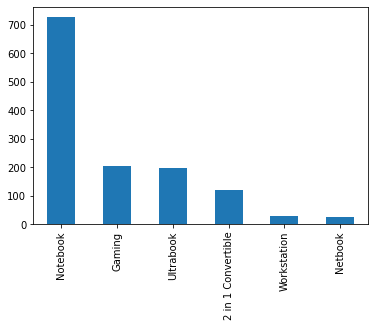

In [178]:
# to see the which type of laptop is there
df['TypeName'].value_counts().plot(kind='bar')

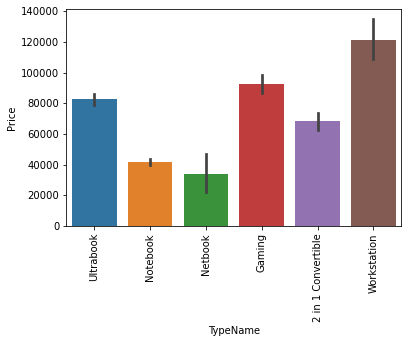

In [179]:
# to see the typewise average price
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Price'>

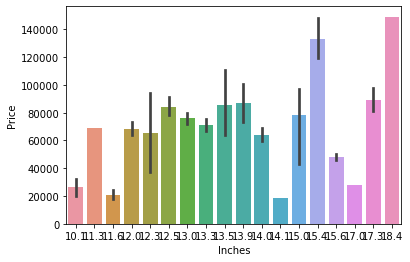

In [180]:
sns.barplot(x=df['Inches'],y=df['Price'])

#### Screen Resolution column ( Feature Engineering)

In [181]:
# separating the laptop touch screen orNOt
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [182]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
675,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,68944.3200,0
350,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,108020.9376,1
275,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,12,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,37992.3696,0
1135,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,1.0TB Hybrid,AMD Radeon R7 M360,Windows 10,2.50,58554.7200,0
898,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M420X,Windows 10,2.18,32713.9200,0


<AxesSubplot:>

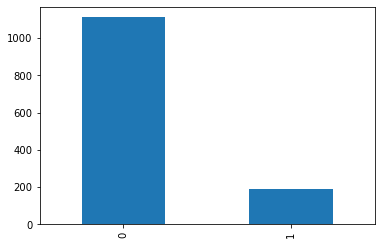

In [183]:
df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

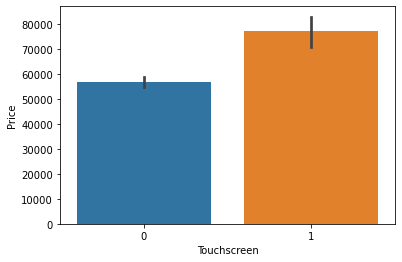

In [184]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])


In [185]:
# see the Laptop having the IPS panle or NOt
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<AxesSubplot:>

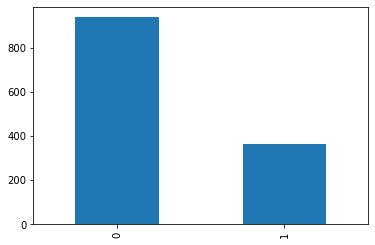

In [186]:
df['IPS'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='IPS', ylabel='Price'>

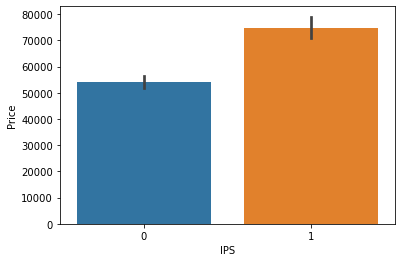

In [187]:
sns.barplot(x=df['IPS'],y=df['Price'])

In [188]:
# separting the screen resolution from the ScreenResolution column and 
# making seprate columns
newdf = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [189]:
df['X_res'] = newdf[0]
df['Y_res'] = newdf[1]

In [190]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
278,Lenovo,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.80,26053.92,0,0,1600,900
1231,Razer,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,186426.72,0,0,Full HD 1920,1080
1252,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6100U 2.3GHz,6,128GB SSD,Nvidia GeForce 920MX,Windows 10,2.40,30316.32,0,0,Full HD 1920,1080
186,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,127712.16,1,0,4K Ultra HD / Touchscreen 3840,2160
1007,HP,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.43,77202.72,0,0,Full HD 1920,1080


In [191]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [192]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
1192,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.86,25840.8000,0,0,1366,768
551,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.90,59513.2272,0,0,1920,1080
1255,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.00,18061.9200,0,0,1366,768
660,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.56,65481.1200,0,0,1920,1080
322,Asus,Notebook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,58288.3200,0,0,1920,1080


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [194]:
# changing the data type of X-res and Y-res column
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [196]:
# find the Correlation of price with other columns
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [197]:
# finding the pixel per inches (PPI) column from the x_res y_res and Inches column
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [198]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [199]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [200]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Cpu          1303 non-null   object 
 4   Ram          1303 non-null   int32  
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   float32
 9   Price        1303 non-null   float64
 10  Touchscreen  1303 non-null   int64  
 11  IPS          1303 non-null   int64  
 12  X_res        1303 non-null   int32  
 13  Y_res        1303 non-null   int32  
 14  ppi          1303 non-null   float64
dtypes: float32(1), float64(3), int32(3), int64(2), object(6)
memory usage: 132.5+ KB


In [201]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [202]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
300,Asus,Notebook,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.30,27119.52,0,0,111.935204
598,Dell,2 in 1 Convertible,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,88977.60,1,0,176.232574
1126,Lenovo,2 in 1 Convertible,Intel Atom x5-Z8550 1.44GHz,4,64GB Flash Storage,Intel HD Graphics 400,Windows 10,0.69,25521.12,1,1,224.173809
1183,Acer,Notebook,Intel Celeron Dual Core N3350 2GHz,4,500GB HDD,Intel HD Graphics 500,Windows 10,2.10,17742.24,0,0,100.454670
987,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.50,63349.92,0,1,141.211998


In [203]:
### Extracting the information from CPU column
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [204]:
# Apply feature Engineering  i5 i7 i3 AMD pentinum
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [205]:
df['Cpu Name']

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1298         Intel Core i7
1299         Intel Core i7
1300    Intel Celeron Dual
1301         Intel Core i7
1302    Intel Celeron Dual
Name: Cpu Name, Length: 1303, dtype: object

In [206]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [207]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [208]:
df['Cpu brand']

0               Intel Core i5
1               Intel Core i5
2               Intel Core i5
3               Intel Core i7
4               Intel Core i5
                ...          
1298            Intel Core i7
1299            Intel Core i7
1300    Other Intel Processor
1301            Intel Core i7
1302    Other Intel Processor
Name: Cpu brand, Length: 1303, dtype: object

<AxesSubplot:>

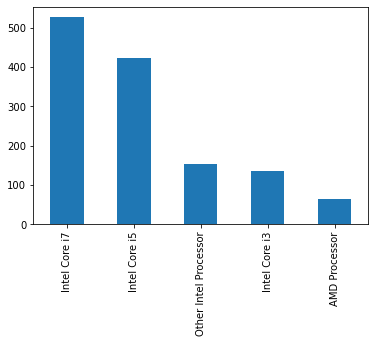

In [209]:
df['Cpu brand'].value_counts().plot(kind='bar')

<function matplotlib.pyplot.show(close=None, block=None)>

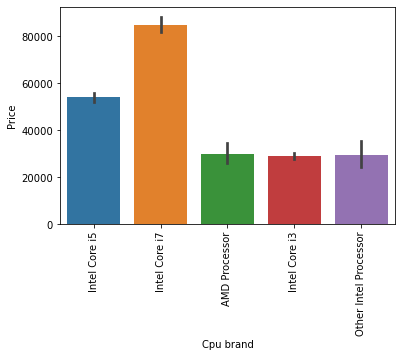

In [210]:
sns.barplot(x=df['Cpu brand'], y= df['Price'])
plt.xticks(rotation='vertical')
plt.show

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   int32  
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float32
 8   Price        1303 non-null   float64
 9   Touchscreen  1303 non-null   int64  
 10  IPS          1303 non-null   int64  
 11  ppi          1303 non-null   float64
 12  Cpu Name     1303 non-null   object 
 13  Cpu brand    1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(8)
memory usage: 132.5+ KB


In [212]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

### Ram Column

<AxesSubplot:>

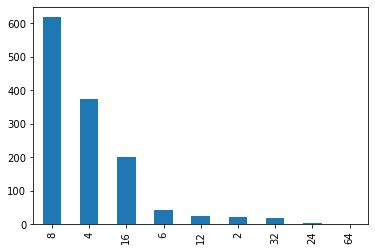

In [213]:
df['Ram'].value_counts().plot(kind='bar')

<function matplotlib.pyplot.show(close=None, block=None)>

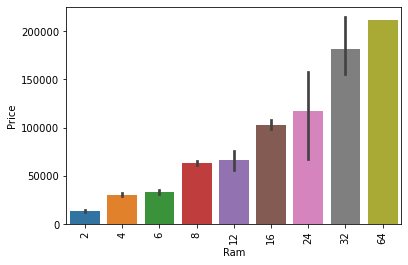

In [214]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show

In [215]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
1130,HP,Notebook,8,2TB HDD,Intel HD Graphics 620,Windows 10,2.04,33513.12,0,0,100.454670,Intel Core i7
173,Toshiba,Notebook,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.00,26053.92,0,0,100.454670,Intel Core i3
806,Toshiba,Notebook,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.10,41558.40,0,0,100.454670,Intel Core i5
961,Lenovo,Ultrabook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,93772.80,0,1,176.232574,Intel Core i5
646,Acer,Ultrabook,8,256GB SSD,Intel Graphics 620,Windows 10,1.80,48964.32,0,1,157.350512,Intel Core i5


In [216]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [217]:
## seprating the HDD, SSD ,FLash Storage,Hybrid
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\Bhakt!\AppData\Local\Temp/ipykernel_11848/1987391658.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\Bhakt!\AppData\Local\Temp/ipykernel_11848/1987391658.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [218]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [219]:
df.drop(columns=['Memory'],inplace=True)

In [220]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [221]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [222]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [223]:
df.corr()['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
ppi            0.473487
HDD           -0.096441
SSD            0.670799
Name: Price, dtype: float64

In [224]:
df.sample()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD
458,Microsoft,Ultrabook,8,Intel Iris Plus Graphics 640,Windows 10 S,1.25,95850.72,1,0,200.84256,Intel Core i7,0,256


In [225]:
# GPU column extraction
df['Gpu'] = df['Gpu'].apply(lambda x:x.split()[0])

In [226]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [227]:
df['Gpu'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu, dtype: int64

In [228]:
# to remove the ARM row
df=df[df['Gpu']!='ARM']

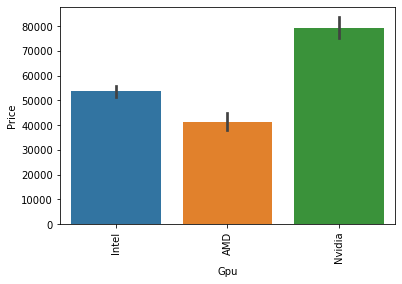

In [229]:
sns.barplot(x=df['Gpu'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [230]:
# seprating the OS from OpSys column
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

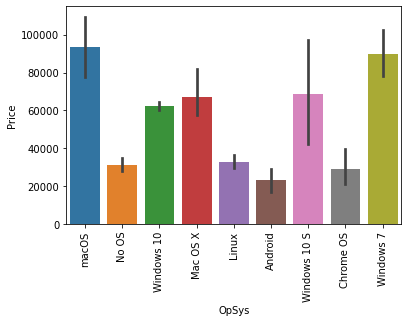

In [231]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [232]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [233]:
df['os'] = df['OpSys'].apply(cat_os)

In [234]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,os
0,Apple,Ultrabook,8,Intel,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Mac
1,Apple,Ultrabook,8,Intel,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Mac
2,HP,Notebook,8,Intel,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Others/No OS/Linux
3,Apple,Ultrabook,16,AMD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,Mac
4,Apple,Ultrabook,8,Intel,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Mac


In [235]:
#remove OpSys column
df.drop(columns=['OpSys'],inplace=True)

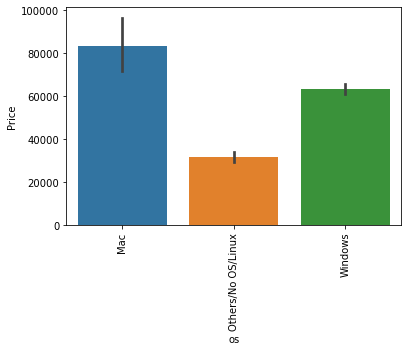

In [236]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

D:\Software\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

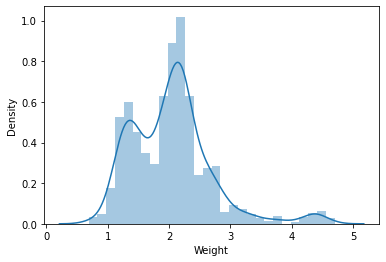

In [237]:
# working on weight column
sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

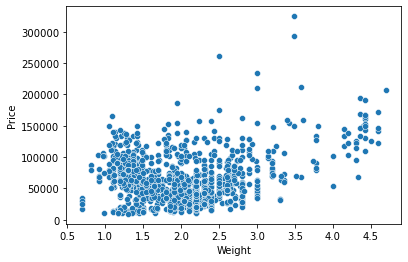

In [238]:
# our target column is littile bit skweed so that we apply the log transformation on price to make 
# normal distribution
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [239]:
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot:>

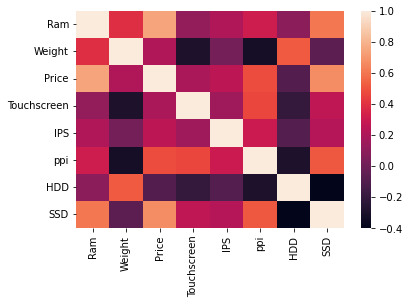

In [240]:
sns.heatmap(df.corr())

D:\Software\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

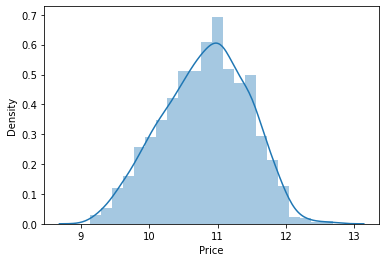

In [241]:
sns.distplot(np.log(df['Price']))

In [242]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [269]:
X

,Company,TypeName,Ram,Gpu,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,os
0,Apple,Ultrabook,8,Intel,1.37,0,1,226.983005,Intel Core i5,0,128,Mac
1,Apple,Ultrabook,8,Intel,1.34,0,0,127.677940,Intel Core i5,0,0,Mac
2,HP,Notebook,8,Intel,1.86,0,0,141.211998,Intel Core i5,0,256,Others/No OS/Linux
3,Apple,Ultrabook,16,AMD,1.83,0,1,220.534624,Intel Core i7,0,512,Mac
4,Apple,Ultrabook,8,Intel,1.37,0,1,226.983005,Intel Core i5,0,256,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel,1.80,1,1,157.350512,Intel Core i7,0,128,Windows
1299,Lenovo,2 in 1 Convertible,16,Intel,1.30,1,1,276.053530,Intel Core i7,0,512,Windows
1300,Lenovo,Notebook,2,Intel,1.50,0,0,111.935204,Other Intel Processor,0,0,Windows
1301,HP,Notebook,6,AMD,2.19,0,0,100.454670,Intel Core i7,1000,0,Windows


In [246]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [263]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [271]:
X_train

,Company,TypeName,Ram,Gpu,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,os
183,Toshiba,Notebook,8,Intel,2.00,0,0,100.454670,Intel Core i5,0,128,Windows
1141,MSI,Gaming,8,Nvidia,2.40,0,0,141.211998,Intel Core i7,1000,128,Windows
1049,Asus,Netbook,4,Intel,1.20,0,0,135.094211,Other Intel Processor,0,0,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,Intel,2.08,1,1,141.211998,Intel Core i3,1000,0,Windows
878,Dell,Notebook,4,Nvidia,2.18,0,0,141.211998,Intel Core i5,1000,128,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,Nvidia,2.20,0,0,100.454670,Intel Core i3,500,0,Windows
299,Asus,Ultrabook,16,Nvidia,1.63,0,0,141.211998,Intel Core i7,0,512,Windows
493,Acer,Notebook,8,AMD,2.20,0,0,100.454670,AMD Processor,1000,0,Windows
527,Lenovo,Notebook,8,Nvidia,2.20,0,0,100.454670,Intel Core i3,2000,0,Others/No OS/Linux


In [249]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [260]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR


In [272]:
#Linear regression
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,3,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8073277448418642
MAE 0.2101782797642887


In [288]:
#Random Forest
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,3,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.6,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8873016460274841
MAE 0.15829473489072965


In [287]:
#Gradient Boost
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,3,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8821146724333305
MAE 0.15922347324266908


In [289]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [290]:
df

,Company,TypeName,Ram,Gpu,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,os
0,Apple,Ultrabook,8,Intel,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Mac
1,Apple,Ultrabook,8,Intel,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Mac
2,HP,Notebook,8,Intel,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Others/No OS/Linux
3,Apple,Ultrabook,16,AMD,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,Mac
4,Apple,Ultrabook,8,Intel,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Windows
1299,Lenovo,2 in 1 Convertible,16,Intel,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Windows
1300,Lenovo,Notebook,2,Intel,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Windows
1301,HP,Notebook,6,AMD,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,Windows


In [291]:
X_train

,Company,TypeName,Ram,Gpu,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,os
183,Toshiba,Notebook,8,Intel,2.00,0,0,100.454670,Intel Core i5,0,128,Windows
1141,MSI,Gaming,8,Nvidia,2.40,0,0,141.211998,Intel Core i7,1000,128,Windows
1049,Asus,Netbook,4,Intel,1.20,0,0,135.094211,Other Intel Processor,0,0,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,Intel,2.08,1,1,141.211998,Intel Core i3,1000,0,Windows
878,Dell,Notebook,4,Nvidia,2.18,0,0,141.211998,Intel Core i5,1000,128,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,Nvidia,2.20,0,0,100.454670,Intel Core i3,500,0,Windows
299,Asus,Ultrabook,16,Nvidia,1.63,0,0,141.211998,Intel Core i7,0,512,Windows
493,Acer,Notebook,8,AMD,2.20,0,0,100.454670,AMD Processor,1000,0,Windows
527,Lenovo,Notebook,8,Nvidia,2.20,0,0,100.454670,Intel Core i3,2000,0,Others/No OS/Linux
